<a href="https://colab.research.google.com/github/YBharatiyadav/CBT-CIP/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, Dropout,Activation,AveragePooling2D
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

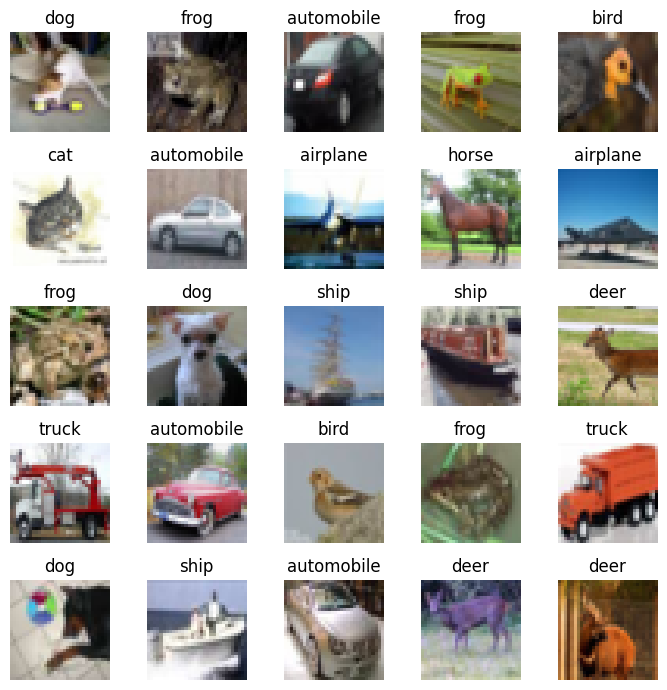

In [ ]:
plt.figure(figsize=(7,7))
for i in range(25):
    idx = np.random.randint(0, x_train.shape[0])
    img = x_train[idx]
    label = y_train[idx][0]

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(128, (2,2), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization()) # Batch normalization added after convolution
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(BatchNormalization()) # Batch normalization added after convolution
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
  # Batch normalization added before the dense layer

model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 31, 31, 128)         │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 31, 31, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 6, 6, 512)           │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,253,130 (4.78 MB)

 Trainable params: 1,251,082 (4.77 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20
)

datagen.fit(x_train)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=60,
    validation_data=(x_test, y_test),
)

Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.4339 - loss: 1.6120 - val_accuracy: 0.5996 - val_loss: 1.1300
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5976 - loss: 1.1306 - val_accuracy: 0.6387 - val_loss: 1.0394
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6483 - loss: 1.0013 - val_accuracy: 0.7008 - val_loss: 0.8623
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6759 - loss: 0.9304 - val_accuracy: 0.5872 - val_loss: 1.3080
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6984 - loss: 0.8604 - val_accuracy: 0.6194 - val_loss: 1.2115
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7097 - loss: 0.8293 - val_accuracy: 0.7480 - val_loss: 0.7325
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7201 - loss: 0.7985 - val_accuracy: 0.7846 - val_loss: 0.6252
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7385 -

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.4791


[0.4891011714935303, 0.8432999849319458]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


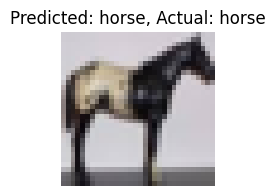

In [ ]:
random_idx = random.randint(0, x_test.shape[0] - 1)
test_image = x_test[random_idx]
test_label = y_test[random_idx][0]

# Expand dimensions to match model input shape and predict the class
test_image_expanded = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image_expanded)
predicted_class = np.argmax(predictions)

# Plot the test image with an adjustable size
plt.figure(figsize=(2,2))  # Adjust the figsize as needed
plt.imshow(test_image)
plt.title(f'Predicted: {class_names[predicted_class]}, Actual: {class_names[test_label]}')
plt.axis('off')
plt.show()